In [3]:
!pip install datasets pandas bertopic sentence-transformers transformers spacy
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

KeyboardInterrupt: 

In [2]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [3]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("talkmap/telecom-conversation-corpus", split="train[:1%]")
df = pd.DataFrame(dataset)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/366 [00:00<?, ?B/s]

telecom_200k.csv:   0%|          | 0.00/715M [00:00<?, ?B/s]

telecom_corpus_supplimental.csv:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3726699 [00:00<?, ? examples/s]

In [4]:
df.head()

,conversation_id,speaker,date_time,text
0,98a6dbc997614ceb8e0734dda38b2524,agent,2023-09-09T15:08:03+00:00,"Thank, thank you for calling Union Mobile. My ..."
1,98a6dbc997614ceb8e0734dda38b2524,client,2023-09-09T15:08:10.846154+00:00,"Hi, I'm having some issues with my phone servi..."
2,98a6dbc997614ceb8e0734dda38b2524,agent,2023-09-09T15:08:20.076923+00:00,"Sorry to hear that, Alissa. Can you please ver..."
3,98a6dbc997614ceb8e0734dda38b2524,client,2023-09-09T15:08:30.692308+00:00,"Sure, my account PIN is 1234."
4,98a6dbc997614ceb8e0734dda38b2524,agent,2023-09-09T15:08:33.461539+00:00,"Thank you, Alissa. I'm unable to verify your i..."


In [5]:
print(df.columns)

Index(['conversation_id', 'speaker', 'date_time', 'text'], dtype='object')


In [5]:
import spacy
nlp = spacy.load("en_core_web_sm")

# we only need the text from the client for processing
user_df = df[df["speaker"] == "client"].copy()

# pre-processing text using spacy
def preprocessing_text(text):
    doc = nlp(text.lower())
    return " ".join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])

user_df["processed_text"] = user_df["text"].apply(preprocessing_text)

In [7]:
user_df.head()

,conversation_id,speaker,date_time,text,processed_text
1,98a6dbc997614ceb8e0734dda38b2524,client,2023-09-09T15:08:10.846154+00:00,"Hi, I'm having some issues with my phone servi...",hi have issue phone service experience drop ca...
3,98a6dbc997614ceb8e0734dda38b2524,client,2023-09-09T15:08:30.692308+00:00,"Sure, my account PIN is 1234.",sure account pin
5,98a6dbc997614ceb8e0734dda38b2524,client,2023-09-09T15:08:42.230770+00:00,"Okay, let me check again. My account PIN is 5678.",okay let check account pin
7,98a6dbc997614ceb8e0734dda38b2524,client,2023-09-09T15:08:55.615386+00:00,"Alright, my account PIN is 9012.",alright account pin
9,98a6dbc997614ceb8e0734dda38b2524,client,2023-09-09T15:09:13.615386+00:00,"Yeah, like I said, I've been experiencing drop...",yeah like say experience drop call poor recept...


In [6]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = BERTopic(embedding_model=embedding_model)

topics, probs = topic_model.fit_transform(user_df["processed_text"])
user_df["topic"] = topics

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [2]:
user_df

NameError: name 'user_df' is not defined

In [10]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2666,-1_datum_unlimited_data_plan,"[datum, unlimited, data, plan, oh, information...",[yeah get error message connect g network keep...
1,0,477,0_thank_appreciated_myrl_tad,"[thank, appreciated, myrl, tad, coy, june, lis...","[thank, thank, thank]"
2,1,448,1_help_thank_sammy_sandra,"[help, thank, sammy, sandra, neva, samantha, g...","[help lot thank neva, thank help sammy, thank ..."
3,2,285,2_pin_account_sure_course,"[pin, account, sure, course, gide, provifferen...","[sure account pin, sure account pin, sure acco..."
4,3,262,3_thank_goode_brendan_theresa,"[thank, goode, brendan, theresa, jenny, ingrid...","[thank theresa, thank theresa, think thank bre..."
...,...,...,...,...,...
384,383,10,383_protect_precaution_disappointing_personal,"[protect, precaution, disappointing, personal,...","[good know protect datum, good know protect da..."
385,384,10,384_tech_technician_savvy_idiot,"[tech, technician, savvy, idiot, von, come, ar...","[um remotely tech savvy, yes great tech savvy ..."
386,385,10,385_remind_wait_rosamond_ahead,"[remind, wait, rosamond, ahead, umh, aware, la...","[sure wait, sure wait, umh sure remind]"
387,386,10,386_fix_angustrate_department_defect,"[fix, angustrate, department, defect, disappoi...","[oh frustrating fix, disappointed okay departm..."


In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd

# Load the model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Define sentiment labels
labels = ['negative', 'neutral', 'positive']

# Define sentiment classification function
def classify_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    scores = torch.nn.functional.softmax(outputs.logits, dim=1)
    predicted = torch.argmax(scores, dim=1).item()
    return labels[predicted]

# Apply to your DataFrame
user_df["sentiment"] = user_df["text"].apply(classify_sentiment)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
user_df["sentiment"] = user_df["text"].apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [9]:
user_df

,conversation_id,speaker,date_time,text,processed_text,topic,sentiment
1,98a6dbc997614ceb8e0734dda38b2524,client,2023-09-09T15:08:10.846154+00:00,"Hi, I'm having some issues with my phone servi...",hi have issue phone service experience drop ca...,122,negative
3,98a6dbc997614ceb8e0734dda38b2524,client,2023-09-09T15:08:30.692308+00:00,"Sure, my account PIN is 1234.",sure account pin,4,neutral
5,98a6dbc997614ceb8e0734dda38b2524,client,2023-09-09T15:08:42.230770+00:00,"Okay, let me check again. My account PIN is 5678.",okay let check account pin,331,neutral
7,98a6dbc997614ceb8e0734dda38b2524,client,2023-09-09T15:08:55.615386+00:00,"Alright, my account PIN is 9012.",alright account pin,97,neutral
9,98a6dbc997614ceb8e0734dda38b2524,client,2023-09-09T15:09:13.615386+00:00,"Yeah, like I said, I've been experiencing drop...",yeah like say experience drop call poor recept...,122,negative
...,...,...,...,...,...,...,...
37249,22161022f1864937833d58e778c00823,client,2023-11-26T09:52:52.769230+00:00,"Alright, I guess that's reasonable. Thank for ...",alright guess reasonable thank help melinda,137,positive
37251,22161022f1864937833d58e778c00823,client,2023-11-26T09:53:03.384615+00:00,"No, that's all. Thanks again.",thank,0,positive
37262,dc65249914654f0bb87c0813736d09a4,client,2023-12-07T15:02:25+00:00,"Hi Randy, thank you for picking up my call. Ye...",hi randy thank pick yes have trouble charge ph...,118,negative
37264,dc65249914654f0bb87c0813736d09a4,client,2023-12-07T15:03:06.538461+00:00,"Actually, I haven't tried that yet. But I did ...",actually try try different charging cable prob...,118,negative


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


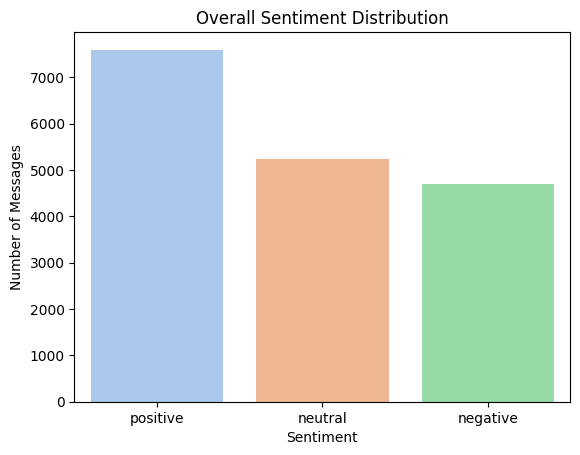

In [10]:


sentiment_counts = user_df['sentiment'].value_counts()

# Bar chart
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")
plt.title("Overall Sentiment Distribution")
plt.ylabel("Number of Messages")
plt.xlabel("Sentiment")
plt.show()

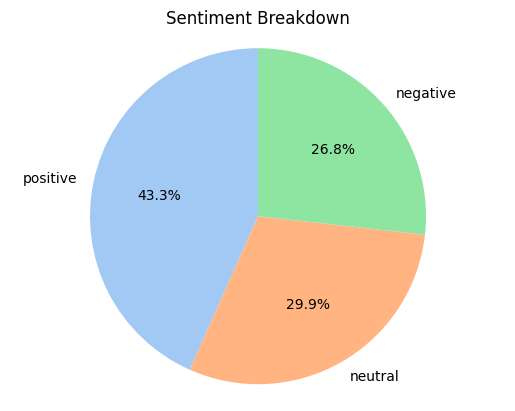

In [11]:
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Sentiment Breakdown")
plt.axis('equal')
plt.show()

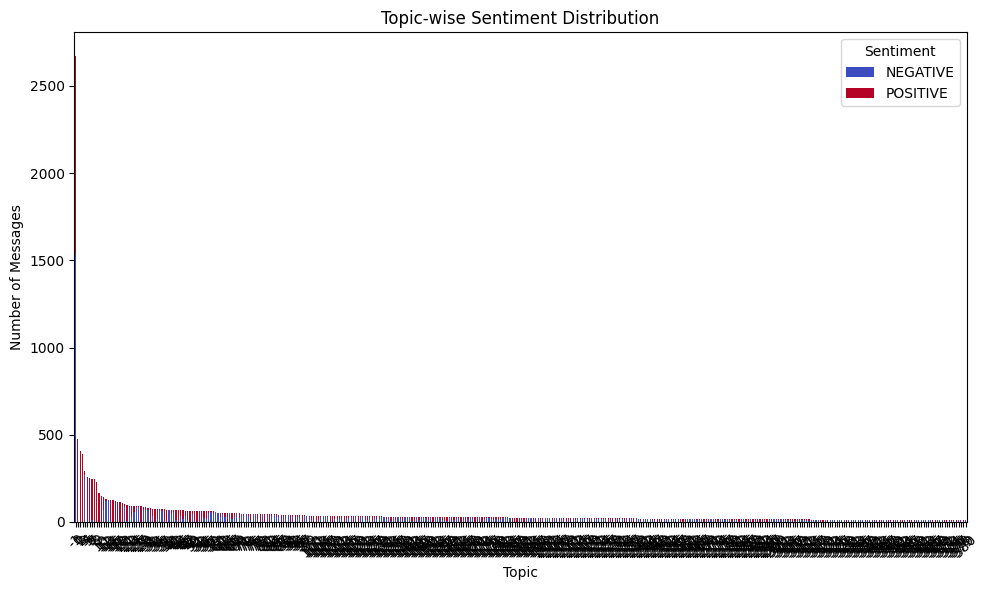

In [ ]:
topic_sentiment = user_df.groupby(['topic', 'sentiment']).size().unstack(fill_value=0)

# Stacked bar chart
topic_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title("Topic-wise Sentiment Distribution")
plt.ylabel("Number of Messages")
plt.xlabel("Topic")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [1]:
# Get top 10 topics by message count
top_topics = user_df['topic'].value_counts().nlargest(10).index
filtered_df = user_df[user_df['topic'].isin(top_topics)]

# Rebuild pivot table
topic_sentiment = filtered_df.groupby(['topic', 'sentiment']).size().unstack(fill_value=0)

# Plot
topic_sentiment.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title("Top 10 Topics by Sentiment")
plt.ylabel("Number of Messages")
plt.xlabel("Topic")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


NameError: name 'user_df' is not defined

In [ ]:
user_df['day'] = user_df['date_time'].dt.date
sentiment_daily = user_df.groupby(['day', 'sentiment']).size().unstack(fill_value=0)

AttributeError: Can only use .dt accessor with datetimelike values